* COMPLETE THE DOCUMENTATION FIRST FOR ALL METHODS WITH EXAMPLE
* PUT ALL ASSERTIONS IN TRY-CATCH BLOCKS SO CODES DON'T CRASH

Let's import some modules that will help us process and visualize vectors, points, matrices and even system of equations

In [1]:
from linear_alg import Point, Vector, Lines2D, Planes3D, HyperPlanes, GaussianElimination as GE
from pprint import pprint
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>1. Learning to Read Python Docs</h3>

The above code imports Vector, Lines2D, Planes3D, HyperPlanes and GE from linear_alg package as well as other regular python modules.<br>But what exactly are all these? These objects are called python module objects. Each is like a python class and a class contains methods and attributes as well as a doc-string that tells us what that class is about. Also each method within a class also contains doc-strings that tell us what the method or function does and how we should call or use it.<br>
<br>Let's see the doc-string for each of these python module objects from the linear_alg package using the `module.__doc__` syntax

In [2]:
module_objects = [Point, Vector, Lines2D, Planes3D, HyperPlanes, GE]

# Let's iterate though and print the name and doc-string of each module object.
for module in module_objects:
    print(module,':',module.__doc__)
    print()

<class 'linear_alg.points.Point'> : None

<class 'linear_alg.vector.Vector'> :  Class for creating and manipulating vector objects,
        exploring vector properties and attributes.

<class 'linear_alg.lines_2d.Lines2D'> :  Class for creating and manipulating 2D line objects,
        exploring their properties and attributes.

<class 'linear_alg.planes_3d.Planes3D'> : Class for creating and exploring Planes in 3D,
    finding Intersections, Coefficients, and other properties
    for planes in 3-Dimensions.
    

<class 'linear_alg.hyper_planes.HyperPlanes'> : Class for creating and exploring HyperPlanes > 3D,
    finding Intersections, Coefficients, and other properties
    for HyperPlanes > 3-Dimensions.
    

<class 'linear_alg.gaussian_elimination.GaussianElimination'> : Class to solve the problem of
        linear intersections for linear
        objects/planes in n-dimensional-space
        where n >= 3, using the
        Gaussian-Elimination Algorithm
    



So we can see what these module objects are about and it even gets more interesting, <br>If we want to know what methods or attributes each module contains, we can simply do...<br>
`module.__dict__`

In [3]:
# Let's see what methods/functions are available for us to use in the Vector class+
# We would pretty-print it using the pprint function

pprint(Vector.__dict__)

mappingproxy({'__dict__': <attribute '__dict__' of 'Vector' objects>,
              '__doc__': ' Class for creating and manipulating vector '
                         'objects,\n'
                         '        exploring vector properties and attributes.',
              '__eq__': <function Vector.__eq__ at 0x00000190BD7F73A8>,
              '__hash__': None,
              '__init__': <function Vector.__init__ at 0x00000190BD811168>,
              '__module__': 'linear_alg.vector',
              '__str__': <function Vector.__str__ at 0x00000190BD7F7318>,
              '__weakref__': <attribute '__weakref__' of 'Vector' objects>,
              '_has_equal_dim': <function Vector._has_equal_dim at 0x00000190BDE1FD38>,
              'add': <function Vector.add at 0x00000190BD7F4558>,
              'area_of_parallelogram': <function Vector.area_of_parallelogram at 0x00000190BDE28288>,
              'area_of_triangle': <function Vector.area_of_triangle at 0x00000190BDE28318>,
             

From the Vector class or module, we can see functions like `plot`, `is_zero_vector`, `v_perp`, `v_parallel` and so on.<br>
Before using any of the functions, we can print their doc-string to see what the function does and learn how to use it properly.<br>Remember doc-strings are written for humans, not for the computer. A doc-string should guide another user and even your future-self on the right ways to call and use your modules, functions or methods...<br>
Let's see what the `dot_product` function in the Vector module does...

In [4]:
print(Vector.dot_product.__doc__)

This method returns the dot-product of two vectors.

        The dot-product is the sum of element-wise multiplication
        of both vectors. It's commutative and returns a number.

        Usage Example:
                    vec1 = Vector([2,3])
                    vec2 = Vector([3,4])

                    vec1.dot_product(vec2)
                    >> (2*3) + (3*4) = 18

        @:param: vec2 is a vector of equal dimension with self
        @:return: A float or int
        


So from the above, we can see that the `dot_product` method returns the dot-product of two vectors.
.<br>Then it goes ahead to tell us what the dot-product is... 
```
"The dot-product is the sum of element-wise multiplication
of both vectors. It's commutative and returns a number."
```
And even offers an example of how to call this method. As well as specifying the method parameters and return values.

Let's try just once more, let's see what the `area_of_triangle` function from the Vector class is about...

In [5]:
print(Vector.area_of_triangle.__doc__)

Return the area of the triangle
        spanned by two vectors

        The area of the triangle spanned by
        two vectors is simply the magnitude of
        the cross product of these two vectors,
        divided by 2. Both vectors must be <= 3D.

        Ideally, both vectors should be 3D, but
        If either vector dimension is less than
        3D, zero-padding is appended.

        Usage Example:
                    vec1 = Vector([1,2,3])
                    vec2 = Vector([2,4,5])

                    vec1.area_of_triangle(vec2)
                    >> <Some-Numerical-Value>

        Zero-appended Example:
                    vec1 = Vector([1,2])
                    vec2 = Vector([2,4,5])

                    On the function call, vec1 becomes...
                    vec1 = Vector([1,2,0])

                    vec1.area_of_triangle(vec2)
                    >> <Some-Numerical-Value>

        :param vec2: vector of no more than 3 dimension
                    same as self.
   

Once again, we see a well detailed method written for Humans by myself. Even though we may not understand what magnitude and cross-product may mean, we get a pretty decent idea what this method does, how it's called and what it returns. This is the beauty of the `linear_alg` package, it is designed to be a refresher module to help Data Scientists both experienced and new, to learn the complex world of Linear Algebra with ease, guidance and functionality.

<h3>2. Points and Vectors:</h3>

**Two fundamental objects in Geometry are:-**

* Points
* Vectors

1. Points: Essentially a point is a location in space, represented visually as a dot. For example, in 2D space, the standard coordinate system is the Cartesian coordinate system. In the cartesian system, a point is an ordered pair of coordinates $(x,y)$ first the $x$ and the $y$. In 3D we can represenet a point in similar way, first $x$ coordinate, its $y$ coordinate and its $z$ coordinate.

2. Vectors: A vector is an object representing a change in position. In Euclidean space, a vector can be likened to an arrow connecting two points. The important properties of a vector in euclidean space are its **magnitude** meaning the length of the arrow and its **direction**. Given a coordinate system, we can numerically represent a vector by the amount of change it represents in each coordinate direction. For example vector $[{2 \over 4}]$ means it goes 2 on the $x$ axis and 4 on the $y$ axis.

3. Note thet we write a vector different form a point. Vectors are usually written in a column or list, surrounded by square brackets. While points are usually a tuple of coordinates in python.

**2A:Difference between a Point and Vector:**
1. A vector does not have a fixed location. Setting the vector at a different point is still the same vector.
2. Two vectors are equal if they represent the same amount of change in each direction. While two points are equal only if they are located in the same place. 
3. Also vectors must not start at the origin point(0,0) a vector has no fixed location. It remains the same wherever it is.

**2B:Plotting a Point:**

First, let's see a point in 2-Dimension. We shall use the `GE.plot_point` function...

In [7]:
print(GE.plot_point.__doc__)

Plot a point in 2D or 3D

        Example:
                point1 = (2, 3)  # 2D
                GE.plot_point(point1)

                point2 = (2, 3, 4)  # 3D
                GE.plot_point(point2)

        :param points: A tuple or triple of Ints or Floats
        :return: None (Just plots the point)
        


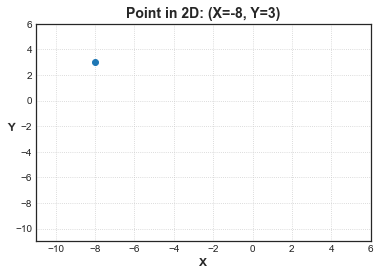

In [11]:
# Simply define a tuple of points in 2D
point1 = (-8, 3) 

# Call the GE.plot_point() function and pass point1
GE.plot_point(point1)

Go ahead and try this by yourself, in the cell below, feel free to choose your own points.
* Define your point
* Call the `Point.plot_points()` function and pass your point as a parameter within the parenthesis.
* This action would plot your point immediataely.

In [ ]:
# Simply define a tuple of points in 2D as done above
# WRITE YOUR CODE UNDER THIS LINE


# Call the Point.plot_point() function and pass your point.
# WRITE YOUR CODE UNDER THIS LINE


Now, let's see a point in 3-Dimension. We shall use the same GE.plot_point function...

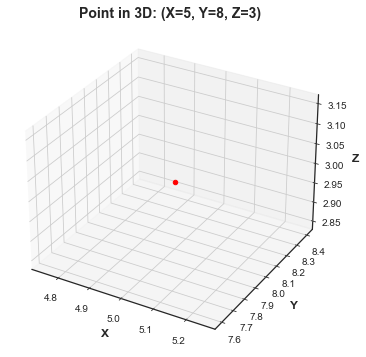

In [12]:
# Simply define a triple of points in 3D
point2 = (5, 8, 3) 

# Call the GE.plot_point() function and pass point2
GE.plot_point(point2)

And just like before, the point gets plotted in 3 Dimensions. Note that if you try to plot a point in higher dimension than 3, the GE method would return an error. This is true in most of programming. Visualizing beyond 3D is difficult for humans, but it can be plotted in some other libraries, but GE does not support plots above 3D at the moment.

Now try your own 3D point in the cell below.

In [ ]:
# Simply define a triple of points in 3D
# WRITE YOUR CODE UNDER THIS LINE


# Call the GE.plot_point() function and pass your point.
# WRITE YOUR CODE UNDER THIS LINE


[[talk about importance of points in geometry and how it's used in machine learning and clustering algorithms to calculate distance between points and vectors using the Euclidean and Manhattan distances.]]

In [4]:
vec1 = Vector((2, 5))
print(vec1)

Vector: [2, 5]


In [5]:
vec2 = Vector((2, 5, 9))

In [9]:
vec2.plot2d()

'ERROR: Dimension Can Only be 2D'

In [9]:
unit_vec1 = vec1.unit_vector()
print(unit_vec1)

Vector: [0.3714, 0.9285]


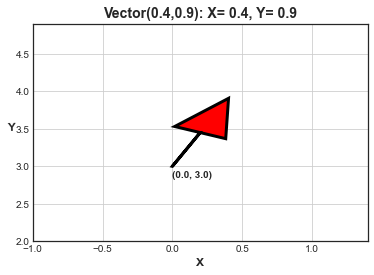

In [17]:
unit_vec1.plot2d()

In [13]:
print(GE.plot_points_2_vec.__doc__)

Given two Points in 2D or 3D,
        plot a Vector from the 1st point
        to the 2nd point

            For Example in 2D:
                    point1 = (1, 2)
                    point2 = (3, 4)
                    GE.plot_points_2_vec(point1, point2)

            For Example in 3D:
                    point1 = (1, 2, 3)
                    point2 = (3, 4, 5)
                    GE.plot_points_2_vec(point1, point2)

        :param point1: A tuple/triple of Int or Float
        :param point2: A tuple/triple of Int or Float
        :return: None (Plots the vector connecting the points)
        


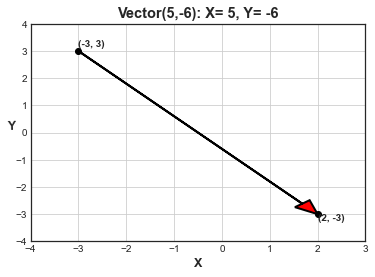

In [15]:
point1 = (-3, 3)
point2 = (2, -3)

GE.plot_points_2_vec(point1, point2)

In [20]:
print(GE.manhattan_distance.__doc__)

Find the Manhattan distance between two points

        point1 and point2 must be in same dimension and
        each must be a tuple or a list.

        Example:
            import GaussianElimination as GE...

            # For 2D
            point1 = (1,2)
            point2 = (3,4)
            GE.manhattan_distance(point1, point2)

            # For 3 and higher D
            point1 = (1, 2, 3)
            point2 = (4, 5,6)
            GE.manhattan_distance(point1, point2)

        :param point1: A list or tuple of ints or floats
        :param point2: A list or tuple of ints or floats
        :return: An int or float of manhattan distance
        


In [21]:
# Let's see the manhattan distance between point1 and point2 above
GE.manhattan_distance(point1, point2)

23

In [22]:
print(GE.euclidean_distance.__doc__)

Find the Euclidean distance between two points

                point1 and point2 must be in same dimension and
                each must be a tuple or a list.

                Example:
                    import GaussianElimination as GE...

                    # For 2D
                    point1 = (1,2)
                    point2 = (3,4)
                    GE.euclidean_distance(point1, point2)

                    # For 3 and higher D
                    point1 = (1, 2, 3)
                    point2 = (4, 5,6)
                    GE.euclidean_distance(point1, point2)

                :param point1: A list or tuple of ints or floats
                :param point2: A list or tuple of ints or floats
                :return: An int or float of euclidean distance
                


In [23]:
# Let's see the Euclidean distance between two point1 and point2

GE.euclidean_distance(point1, point2)

18.6815

In [24]:
# The vector connecting these two points is actually...
vec = Vector((5, -18))
print(vec)

Vector: [5, -18]


In [25]:
# Let's see the magnitude of the vector
vec.magnitude()

18.6815

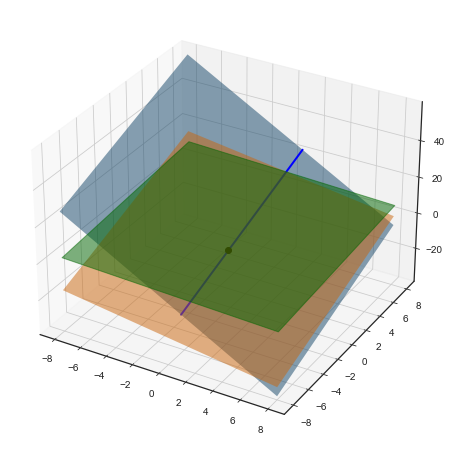

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x, y = np.linspace(-8,8,100), np.linspace(-8,8,100)
X, Y = np.meshgrid(x,y)
Z1 = 11 - 4*X + 2*Y
Z2 = (-16 - 2*X + 4*Y) / 2
Z3 = (17 - X + 2*Y) / 4

ax.plot_surface(X,Y,Z1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(X,Y,Z2, alpha=0.5, rstride=100, cstride=100)


ax.plot((1,1),(-8,8),(-9,23), lw=2, c='b')
ax.plot_surface(X,Y,Z3, alpha=0.5, facecolors='g', rstride=100, cstride=100)
ax.plot((1,),(-2,),(3,), lw=2, c='k', marker='o')

plt.show()

In [39]:
line1 = Lines2D((7.204, 3.182), 8.68)
line2 = Lines2D((8.172, 4.114), 9.883)
objects = [line1, line2]

ge = GE(2, objects)

In [40]:
print(ge)

Linear System:
Equation 1: (7.204, 3.182),8.68
Equation 2: (8.172, 4.114),9.883


In [41]:
ge.unique_intersection()

(1.173, 0.073)

In [42]:
print(ge.compute_rref())

Linear System:
Equation 1: (1.0, 0.0),1.173
Equation 2: (0.0, 1.0),0.073


In [43]:
print(ge.summary())

INTERSECTION:(System of Equations with One Unique Solution)
{'X': 1.173, 'Y': 0.073}


Intersection: (1.173, 0.073)


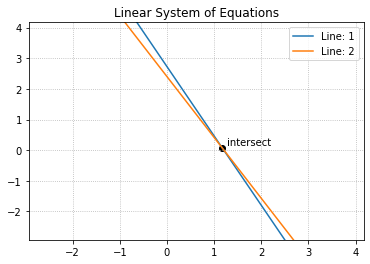

In [44]:
ge.plot_lines()

In [45]:
line3 = Lines2D((1.182, 5.562), 6.744)
line4 = Lines2D((1.773, 8.343), 9.525)
objects = [line3, line4]

ge = GE(2,objects)
print(ge)

Linear System:
Equation 1: (1.182, 5.562),6.744
Equation 2: (1.773, 8.343),9.525


In [46]:
print(ge.unique_intersection())

None


In [47]:
print(ge.compute_rref())

Linear System:
Equation 1: (1.182, 5.562),6.744
Equation 2: (0.0, 0.0),-0.698562


In [48]:
print(ge.summary())

INCONSISTENT:(System of Equations with No Solution)


No Intersection: (no solution)


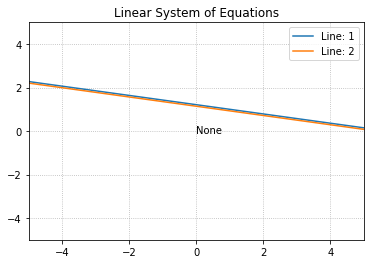

In [49]:
ge.plot_lines()

In [50]:
line3.is_parallel_to(line4)

True

In [51]:
line3.is_equal_to(line4)

False

In [52]:
line3.find_slope_and_intercept()

(-0.2126, 1.213)

In [53]:
line4.find_slope_and_intercept()

(-0.2126, 1.142)

* Line3 and line4 look very similar. Infact they have the same slope of -0.2126 but different intercepts. Therefore they are different. This means at the point where $x$ is 0, line 3 cuts through the $y$-axis at 1.213, while line4 cuts through the $y$-axis at 1.142 when $x$ is 0.
* Also line3 and line4 are parallel to each other, but are not the same.

In [54]:
line5 = Lines2D((4.046, 2.836), 1.21)
line6 = Lines2D((10.115, 7.09), 3.025)
objects = [line5, line6]

ge = GE(2,objects)
print(ge)

Linear System:
Equation 1: (4.046, 2.836),1.21
Equation 2: (10.115, 7.09),3.025


In [55]:
print(ge.unique_intersection())

inf


In [56]:
print(ge.compute_rref())

Linear System:
Equation 1: (1.0, 0.701),0.299
Equation 2: (0.0, 0.0),0.0


In [57]:
print(ge.summary())

INFINITE INTERSECTIONS:(System of Equations with Infinite Solutions)


In [58]:
print(line5.is_parallel_to(line6))

True


In [59]:
print(line5.is_equal_to(line6))

True


Infinitely Many Solutions:


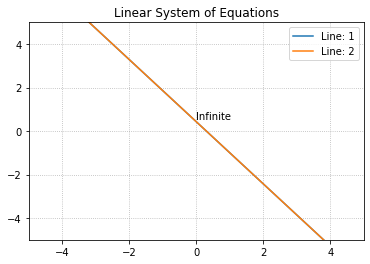

In [60]:
ge.plot_lines()

In [61]:
line5.find_slope_and_intercept()

(-1.4281, 0.427)

In [62]:
line6.find_slope_and_intercept()

(-1.4281, 0.427)

* line5 and line6 are infact the same line.
* They have the same slope of -1.4281 and same intercept of 0.427. This means at the point where  𝑥  is 0, line5 cuts through the  𝑦 -axis 0.427, exactly same as line6.
* Also we saw that both line5 and line6 are parallel to each other, and are the same.

<b><h3>Note that multiplying a vector by a negative number reverses the direction of the vector in addition to possibly changing its magnitude.</b></h3>

lesson_2_quiz_1 let's add the following vectors

In [43]:
vec1 = Vector([8.218, -9.341])
vec2 = Vector([-1.129, 2.111])

print(vec1.add(vec2))

Vector: [7.089, -7.229999999999999]


lesson_2_quiz_2 let's minus the following vectors

In [44]:
vec3 = Vector([7.119, 8.215])
vec4 = Vector([-8.223, 0.878])

print(vec3.minus(vec4))

Vector: [15.342, 7.337]


lesson_2_quiz_3 let's  scalar multiply the following vectors

In [45]:
vec5 = Vector([1.671, -1.012, -0.318])
scalar = 7.41

print(vec5.scalar_multiply(scalar))

Vector: [12.3821, -7.4989, -2.3564]


## **Vector Normalization:**

This is the process of finding the unit vector and involves 2 steps:

1. Computing the magnitude of the vector 
2. Multiplying the inverse of the magnitude by the vector to normalise it (unit vector)

if vector is $v$ then its magnitude is **$\vert \vec v\vert$** and it's normalised or unit vector sign is **$\| \vec v\|$**

lesson_2_quiz_4 let's compute magnitude

lesson_2_quiz_5 let's compute magnitude

lesson_2_quiz_6 let's unit vector

lesson_2_quiz_7 let's unit vector

### **Inner Product or Dot Product:**

This is one of the most important concepts in Linear Algebra. The inner or Dot product (since we always represent it by a dot between the vectors to be multiplied) lets us find the angle between two different vectors.
<br>It is calculated by first multiplying the corresponding coordinates of equal sized vectors and summing it up. The dot product is a number.

**Note That:** 
1. The magnitude of a vector is the square root of its dot-product on itself.
2. The Dot product of two vectors is a figure that is usually between the negative of the product of their magnitudes and the product of their magnitudes.
3. We can calculate the radian angle between two vectors from their dot-product and magnitudes. 
<h2>$\theta = arccos{(dot-product-of-vectors\over product-of-magnitudes)}$</h2>

Let's calculate some dot products

In [14]:
vec10 = Vector([7.887, 4.138])
vec11 = Vector([-8.802, 6.776])

# Calculate the dot product
vec10.dot_product(vec11)

-41.382286

In [15]:
vec12 = Vector([-5.955, -4.904, -1.874])
vec13 = Vector([-4.496, -8.755, 7.103])

# Calculate the dot product
vec12.dot_product(vec13)

56.397178

Proof that the magnitude of a vector is the square root of its dot product on itself.

In [16]:
vec13.magnitude()

12.137407

Now let's call the dot-product of vec13 on itself and find its' square-root

In [17]:
test = vec13.dot_product(vec13)
test = math.sqrt(test)
round(test,4)

12.1374

Above test proven!!

Let's calculate some angles of vectors

In [18]:
math.acos.__doc__

'Return the arc cosine (measured in radians) of x.'

### **Parallel and Orthogonal vectors:**
Parallel = <h3>$\vec v^{\|}$</h3>
Orthogonal = <h3>$\vec v^{\perp}$</h3>
1. **Parallel Vectors:**<br>
We say two vectors are parallel if one is a scalar multiple of the other. Thus vector $v$ is parallel to itself $(1 * v)$, $(0 * v)$, $(2 * v)$, $(0.5 * v)$... Even if they point in opposite direction such as $(-1 * v)$, all that matters is if one is a scalar multiple of the other. To be parallel, it means two vectors have an angle of zero or 180 degrees between them.
2. **Orthogonal Vectors:**<br>Two vectors are orthogonal if their dot product is equal to 0. This is possible in two situations:
>>A. Either one of the vectors is the zero-vector<br>
>>B. They are at **right-angled** to one another

The Zero-Vector: Is unique in that it is the only vector that is both parallel and orthogonal to all other vectors and it's the only vector orthogonal to itself. Note that if some vector is orthogonal to itself, then it must be the zero-vector. The zero vector also has a magnitude of zero and it has no direction and cannot be normalized.

**Coding Exercise: Checking for Parallelism and Orthogonality:**

### Projecting Vectors:

Orthogonality is a very powerful tool for decomposing objects into combinations of simpler objects in a structured way.

When a vector is projected from unto another vector, the perpendicular line between the projected vector and the base vector is called the 'perp'. If the projecting vector is $\vec v$ then the imaginary line with 90 degrees between it and the basis vector is called 'V- perp' symbolised as:- <h4>$\vec v^{\perp}$</h4>

Projecting a vector shows that the magnitude of the projected vector is the sum of it's parallel vector and the orthogonal vector perpendicular to the base vector:
<h3>$\vec v = \vec v^{\|} +  \vec v^{\perp}$</h3>

Thus given a non-zero basis vector, we can express any vector as the sum of two vectors<br>
>> One that's parallel to the basis vector <br>
>> And one that's orthogonal to the basis vector.

**SOH:** Sine of a Right-Angled Triangle is Opposite divided by the Hypothenuse<br>
**CAH:** Cosine of a Righy-Angled Triangle is Adjacent divided by the Hypothenuse.<br>
**TOA:** Cosine of a Righy-Angled Triangle is Adjacent divided by the Hypothenuse. 

Note that the length of v-parallel is the length of v times the unit vector in the direction of vector b, which is parallel to v-parallel.
<h3>$|\vec v^{\|}| = | \vec v | * \| \vec b\|$</h3>
This can be extrapolated to mean
<h3>$\vec v^{\|} = (\vec v . \| \vec b \|)* \| \vec b\|$</h3>

<h4>Calculating vector projections, orthogonals and decomposing vectors</h4>

In [19]:
x = [2, 3]
y = [5, 6, 2]

In [20]:
while True:
    if len(x) + len(y) == 6:
        break
    if len(x) < 3:
        x.append(0)
    if len(y) < 3:
        y.append(0)

In [21]:
print(x, y)

[2, 3, 0] [5, 6, 2]


<h3><b>Cross-Products, Area-of-Parallelogram and Area of Triangle:</b></h3>

Cross products are another type of vector multiplications that only exist in 3-Dimensions. Unlike a dot-product that returns a number, cross-products return a vector. Geometrically, the cross-product of vectors $v$ and $w$, is the vector orthogonal to both $v$ and $w$. Cross products are non-commutative, this means the order matters as cross product of $v$ * $w$ != that of $w$ * $v$.
<h4>$\|\vec v*\vec w\| = \|\vec v\| * \|\vec w\| * sin\theta$</h4>
<br>The cross-product-vector of vectors $v$ and $w$ has a magnitude equal to the product of the magnitudes of the two composing vectors and sin of theta. Where theta is the angle between the two vectors. Note that if theta is $\pi$ $(180^o)$ or if theta is $0^o$, then the cross product will have magnitude of 0. In other words, the cross product of two parallel vectors is the zero-vector. Also, if either $v$ or $w$ is the zero-vector, then the cross product will be the zero-vector as well.

Area of Parallelogram:
Given two vectors $v$ and $w$, originating from the same point and taking $w$ as the base. We can form a parallelogram. First we take $w$ as the base of the parallelogram and $v$ is the hypothenuse of the right angled triangle formed by appending the orthogonal component of $v$ unto $b$. This orthogonal component is the height of the parallelogram formed from $v$ and $w$. 
<br>Using SOH, we can say the sin of theta is equal to the opposite over hypothenuse. which means. the height of the parallelogram is equal to the magnitude of vector $v$ times the sin of theta.<br>Therefore the area of a parallelogram fromed by two vectors is ofcourse the $height * base$. And the area of a triangle is half of the area of a parallelogram, so area of traingle is $0.5 * (height * base)$ of the paralleloram.
This simply means the area of a parallelogram formed by $v$ and $w$ is the magnitude of the cross-product of $v$ and $w$.

In [22]:
# find the cross-product of the following vectors
vec_v = Vector((8.462, 7.893, -8.187))
vec_b = Vector((6.984, -5.975, 4.778))
print(vec_v.cross_product(vec_b))

Vector: [-11.204570999999994, -97.609444, -105.68516199999999]


In [23]:
# Find the area of the parallelogram spanned by these two vectors
vec_v = Vector((-8.987, -9.838, 5.031))
vec_b = Vector((-4.268, -1.861, -8.866))
vec_v.area_of_parallelogram(vec_b)

142.122221

In [24]:
# Find the area of the triangle spanned by these two vectors
vec_v = Vector((1.5, 9.547, 3.691))
vec_b = Vector((-6.007, 0.124, 5.772))
vec_v.area_of_triangle(vec_b)

42.564937

<h2>Lesson Two: Intersections</h2>

<b>Lines in Two Dimensions:</b>

A line in 2 dimensions can be defined by 2 essential properties
1. Base Point: $(X_0)$ This is the point the line passes through
2. Direction Vector: $(\vec v)$ A vector that gives the direction of the line

Given the base point and a direction vector, we can represent all points in a line in the form<br>
$X(t) = X_0 * t\vec v$

If we were to theoretically plug in all possible values of $t$ and plot them, we'd end up with a plot of all the points in a line. This is called a _parametrization of the line_, since we're expressing the line via the param $t$.

**Note That:** 
1. A given line has infinitely many base points, since we can pick any point on the line to be the base.
2. And a line has infinitely many direction vectors. Since we can multiply ant direction vector by a positive scalar an it'll still point in the direction.
3. If we multiply the dir vector by a negative number, we get the same set of points parametrized from the opposite direction.
4. We can't multiply a dir vector by 0 though, or else we collapse the line to a point
5. Line equation is usually given as $y = mx + b$. Where b is the intercept of the line at point y $(x=0, y=y).$
6. This line equation representation is faulty however, since we can't represent vertical lines.
7. A more general form of equation for a line is $Ax + By = k$ where $A$ $B$ and $k$ are numbers and either $A$ or $B$ is non-zero.


* Two lines in 2D are parallel if their normal vectors are parallel.

A. $3x -2y = 1$ =>($3/-2$)
B. $-6x + 4y = 0$ =>($-6/4 => -3/2$)

* In 2D, the above simply means that to find if two lines $A$ and $B$ are parallel, confirm that the coefficients of both are multiples of each other

* If two lines are not parallel, then they would have an intersection at a single point.
* If two lines are parallel then there are two possibilities, they might not intersect, or they would intersect at infinitely many points, meaning they are the same _coincident_ line.
* In linear algebra, this trichotomy of cases for intersection is the rule... When asked if two linear objects intersect, the answer is that there'll either be one intersection, none or infinitely many intersections.

<h3>The Direction Vector</h3>

If we write down any two points on the line, then the vector connecting the points will be the direction vector.<br>

**How To Find The Direction Vector:**

1. $Ax + By = k$... if $k$ = $0$, then $Ax + By = 0$<br>
This line will pass through the origin, since the case point for it will be $(0,0)$. If we now draw a vector from the origin to another point $(x,y)$ on the line, then the corresponding vector $|\vec{x\over y}|$ will be a direction vector for the line. There is a good trick that shows that the points $(x,y)$ are on this line iff, the direction vector to the line $|\vec{x\over y}|$ is orthogonal to the vector $|\vec{A\over B}|$. This means we can find the direction vector for this line by picking some vector orthogonal to $|\vec{A\over B}|$. And one trick in 2D shows that the vector $|\vec{B\over -A}|$ is orthogonal to $|\vec{A\over B}|$. Even if $k$ != $0$, this trick still works.<br>So a direction vector for $Ax + By = k$ will still be $|\vec{B\over -A}|$. Note that a vector that is orthogonal to a line is also called a **normal-vector**.

<h3>Intersections of lines in 2D</h3>

In 2D both normal and drection vectors are equivalent.<br>
**If two lines are parallel, how can we compute if they're equal?**<br>
Two parallel lines are equal iff the vector connecting one point on each line is orthogonal to the lines normal vector. So find a point on each line, then find the vector connecting those points, then compute if that vector is orthogonal to the normal vector of either line. If it is, the lines are equal and have infinitely many intersections. If not, the lines are parallel and different with no intersection.

<h3>More Than 2 Lines in 2D</h3>

Since systems of Linear-Equations are questions about common intersection points among all lines. That is points that are common to all the objects/lines, then if there is no common point of intersection, the system of equations is termed as **Inconsistent**.

<h3>Planes in 3 Dimensions:</h3>

1. Two different parallel planes do not intersect, just like with lines in 2D, two different lines with the same normal vector do not intersect. This means the two lines are parallel but different.

2. Given a line in 3D such as $ax + by + cz = k$, if $k$ == 0, then $\vec abc$ * $\vec xyz$ == 0.<br>Note that $\vec abc$ is the normal vector in this case and not a direction vector too as in 2D.

3. Similarly to lines in 2D, if two planes are parallel, meaning if they have parallel normal vectors, then we can pick a point on one plane and another point on a diffrent plane and find the vector connecting these two points. If this vector is orthogonal to each line's normal vector, then both planes are equal and the same.

<h3>Some Observations:</h3>

* One equation in 2 variables defines a line. E.G $2x + 3y = 5$
* One equation in 3 variables defines a plane. E.G $2x + 3y + 1z = 18$
* In general, a single equation in some number of variables will define a linear object that has a number of dimensions one-less than the number of variables.
* Note that the coefficients of a linear equation are the coordinates for a normal vector to the linear object it defines.<br>Thus a linear equation $2x + 3y + 1z = 18$ has a  normal vector with coordinates $[2, 3, 1]$.
* This is why the normal vector is a useful piece of information for defining a linear object.
* Note that we need atleast 2 lines in 2 variables to obtain a unique intersection.
* We need atleast 3 planes in 3 variables or 3 dimensional space to obtain a unique intersection.
* The above observations will generalise as we progress to higher dimensions.

<h3>Rules for Manipulating Systems of Equations (SoE).</h3>

Are there rules for solving the intersection of planes in 3D and higher? Because solving this algebra symbolically will be a nightmare as dimensions increase.

**What algorithm can we follow that will always find the solution to a new system?**<br>

<u>The Base Rules are:-</u>

* Manipulations should preserve the solution and not alter the geometry of the equation.
* Manipulations should be reversible to the original equations.

<u>Legal Steps:</u>

* **Swapping order of equations**: This is legal since SoE don't depend on the order in which we list them. Swapping preserves the solution and is easily reversed by returning the equations to their original positions.
* **Multiply both-sides of an equation with a non-zero number $\alpha$**: This is legal, preserves the solution and is easily reversible by multiplying both-sides of the equation by the inverse of the number $1\over \alpha$
* **If we have 2 Equations, we can add one to the other**: This is also legal, preserves the solution and is easily reversible by subtracting the first equation from the 2nd in the new system.
* **If we have 2 Equations, we can add one times some alpha to the other**: This is also legal, preserves the solution and is easily reversible by simply adding negative-alpha times the first equation to the second one. 

<h3>Solving a Systems of Equations (SoE).</h3>

We shall apply the solution through an algorithm called...

**Gaussian Elimination:**
<br>This was named after the 19th Century German Mathematician Karl Gauss. Note tho, it was known to the Chinese as early as the 2nd Century BCE. The basic idea of the Gaussian Elimination is to gradually clear variables in successive equations. Here, the first variable in each preceding equation is solved and eliminated from the following equations. In a process called the **Triangular-Form**.<br>However, this **Triangular-Form** does not represent the same set of planes as the system we started with, cos by adding and subtracting equations, we do change the planes involved, however, we do not change the **common-intersection-points** if one exists.

* Note that if we ever run into a case where the left hand side of our equation is 0 and the right hand is not zero, we can immdiately stop and say the SoE has no solution, given that we have only performed legal actions on our SoE.
* If while solving for a particular variable, we get to a situation where we have 0 = 0, then that equation is redundant and we keep solving with the remaining equations.
* If while performing Gaussian Elimination, we get to a situation where each variable $x,y,z$ is a pivot variable, then that SoE has a unique intersection point. If atleast one variable is a free or indeterminate variable, then that SoE has infinitely many intersections.
* Each non-pivot or free variable will be an independent parameter in our solution set. this means the dimension of our solution set will be equal to the number of free variables we have.<br>If there's one free variable, the solution set will be a line, if there are two free variables, the solution set will be a plane and so on as we move to higher dimensions

**Characteristics of Systems of Equations with no Solution:**

1. The planes defined by the equations, won't have a common intersection
2. We'd encounter the equation $0 = k$ for some non-zero $k$ during gaussian-elimination.

**Characteristics of Systems of Equations with one Solution:**

1. The planes defined by the equations have a common intersection.
2. After reaching triangular form, each variable is a leading variable in an equation.

**Characteristics of Systems of Equations with infinitely many Solution:**

1. After reaching triangular-form, at least one variable is a free-variable alongside pivot or leading variables in an equation.
2. There are no equations of the form $0 = k$ for some non-zero $k$.

**Summary:**

**Note That...**

1. As with lines and planes, a hyper-plane in n-dimensions is an **(n-1)** dimensional object and it can be specified by a normal vector and a Base-point.
2. Also like lines and planes, the coefficients of the variables in the equation give a normal-vector for the higher dimension hyper-plane. And we need at least n-different hyper-planes in n-dimensions to obtain a unique intersection point.
3. Most importantly, Gaussian Elimination works just as well in hyper-planes and sytems of equations in higher dimensions as it does with just 2 or 3 variables. 


Solving and plotting the following system of equations

`
4x -2y + z =11
-2x +4y -2z = -16
x -2y + 4z = 17
`

First solve it with numpy.linalg package

`
M = np.array([[4., -2., 1.], [-2., 4., -2.], [1., -2., 4.]])

b = np.array([11., -16., 17.])

np.linalg.solve(M, b)
array([ 1., -2.,  3.])
`

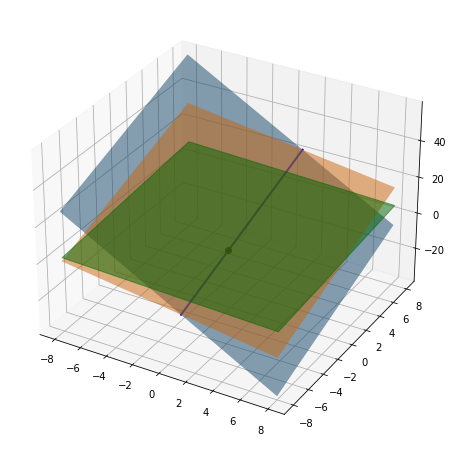

<h2>Kalman Filters:</h2>

Kalman filtering is an algorithm that provides estimates of some unknown variables given the measurements observed over time. Kalman filters have been demonstrating its usefulness in various applications. Kalman filters have relatively simple form and require small computational power.

<h3>Notation:</h3>

<h3>$x^! = x + \overset{*}{x}$</h3>

<br><b>This means that the $x$ position after motion ($x^!$) is equal to the $x$ position before motion ($x$) plus the velocity in the $x$ direction ($\overset {*}{x}$).</b><br>
The above doesn't seem to make much sense cos it inherently assumes that the duration ($Δ$) = 1 is doesn't take into consideration longer duration. For example, if I drove for 10 seconds, I'd likely be at a different, likely farther place than if I drove for just 1 second.

The "complete" version of the Karman-Filter-Equation equation above would be:-

<h3>$x^! = x + \overset{*}{x}Δt$</h3>... Where:-

* $x$ = $x$ Position before motion
* $x^!$ = $x$ Position after motion
* $\overset {*}{x}$ = Velocity in $x$ direction
* $Δt$ = Duration of motion `delta t`

**Simplifying Kalman Filters**:

Generally, lower case variables indicate vectors and upper-case indicate matrices. With matrices and vectors come transpose, inverse, identity-matrix and matrix algebra and so on. The goal here is not to memorise anything but to build a good, fundamental understanding of Linear Algebra.

Case For Self-Driving cars Engineers:

Kalman Filter Equations Fx versus Bu
Consider this specific Kalman filter equation: 

$x^! = Fx + Bu$

This equation is the move function that updates your beliefs in between sensor measurements. Fx models motion based on velocity, acceleration, angular velocity, etc of the object you are tracking.

B is called the control matrix and u is the control vector. Bu measures extra forces on the object you are tracking. An example would be if a robot was receiving direct commands to move in a specific direction, and you knew what those commands were and when they occurred. Like if you told your robot to move backwards 10 feet, you could model this with the Bu term.

When you take the self-driving car engineer nanodegree, you'll use Kalman filters to track objects that are moving around your vehicle like other cars, pedestrians, bicyclists, etc. In those cases, you would ignore BuBu because you do not have control over the movement of other objects. The Kalman filter equation becomes x' = Fxx 
′
 =Fx.

**What is a vector? Physics versus Computer Programming**

You might have learned at some point that a vector is a measurement or quantity that has both a magnitude and a direction. Examples might be distance along a y-axis or velocity towards the north-west.

But in computer programming, when we say "vector" we are just referring a list of values. These two ways of thinking about vectors are actually deeply related.

# Becoming "Wikipedia proficient"

The goal of this course is **not** for you to memorize how to calculate a dot product or multiply matrices. The goal is for you to be able to do something useful with a wikipedia page like their [article on Kalman Filters](https://en.wikipedia.org/wiki/Kalman_filter), even if requires some additional research and review from you.

But these pages are usually written in the notation of **linear algebra** and not the notation of computer programming. 

In this notebook you will learn something about how to navigate the notation of linear algebra and how to translate it into computer code. 

## Analyzing The Dot Product Equation
At the time I'm writing this, the wikipedia article on the [dot product](https://en.wikipedia.org/wiki/Dot_product) begins with a section called **Algebraic Definition**, which starts like this:

> The dot product of two vectors $\mathbf{a} = [a_1, a_2, \ldots, a_n]$ and $\mathbf{b} = [b_1, b_2, \ldots, b_n]$ is defined as: 
> 
> $$\mathbf{a} \cdot \mathbf{b} = \sum _{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n}$$

If you don't know what to look for, this can be pretty unhelfpul. Let's take a look at three features of this equation which can be helpful to understand...

### Feature 1 - Lowercase vs uppercase variables
This equation only uses lowercase variables. In general, lowercase variables are used when discussing **vectors** or **scalars** (regular numbers like 3, -2.5, etc...) while UPPERCASE variables are reserved for matrices. 

### Feature 2 - Bold vs regular typeface for variables
A variable in **bold** typeface indicates a vector or a matrix. A variable in regular typeface is a scalar.


### Feature 3 - "..." in equations
When you see three dots $\ldots$ in an equation it means "this pattern could continue any number of times"

#### EXAMPLE 1 - APPLYING FEATURES 1, 2, and 3
When you see something like $\mathbf{a} = [a_1, a_2, \ldots, a_n]$ you can infer the following:

1. **$\mathbf{a}$ is a vector**: since a is bold it's either a vector OR a matrix, but since it's also lowercase, we know it can only be a vector.

2. **$\mathbf{a}$ can have any length**: since there's a $\ldots$ in the definition for $\mathbf{a}$, we know that in addition to $a_1$ and $a_2$ there could also be $a_3$, $a_4$, and so on... 

3. **The values in the $\mathbf{a}$ vector are scalars**: since $a_1$ is lowercase and non-bold we know that it must be a scalar (regular number) as opposed to being a vector or matrix.

### Feature 4 - $\Sigma$ Notation
The symbol $\Sigma$ is the uppercase version of the greek letter "sigma" and it is an instruction to perform a sum.

**When you see a $\Sigma$ you should think "for loop!"**

In the case of the dot product, the sigma instructs us to sum $a_ib_i$ for $i=1,2, \ldots, n$. And in this case $n$ is just the length of the $\mathbf{a}$ and $\mathbf{b}$ vectors.

How this for loop works is best explained with an example. Take a look at the `dot_product` function defined below. Try to read through the comments and really understand how the code connects to math.


**The MATH**

The dot product of two vectors $\mathbf{a} = [a_1, a_2, \ldots, a_n]$ and $\mathbf{b} = [b_1, b_2, \ldots, b_n]$ is defined as: 

$$\mathbf{a} \cdot \mathbf{b} = \sum _{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n}$$

In [26]:
# The CODE

def dot_product(a, b):
    # start by checking that a and b have the same length.
    # I know they SHOULD have the same length because they
    # each are DEFINED (in the first line above) to have n 
    # elements. Even though n isn't specified, the fact that 
    # a goes from 0 to n AND b does the same (instead of going
    # from 0 to m for example) implies that these vectors 
    # always should have the same length.
    if len(a) != len(b):
        print("Error! Vectors must have the same length!")
        return None
    
    # let's call the length of these vectors "n" so we can
    # be consistent with the mathematical notation
    n = len(a)
    
    # Since we want to add up a bunch of terms, we should
    # start by setting the total to zero and then add to 
    # this total n times.
    total = 0
    
    # now we are going to perform the multiplication!
    # note that the algebraic version goes from 1 to n. 
    # The Python version of this indexing will go from 
    # 0 to n-1 (recall that range(3) returns [0,1,2] for example).
    for i in range(n): 
        a_i = a[i]
        b_i = b[i]
        total = total + a_i * b_i
        
    return total



In [27]:
# let's see if it works
a = [3,2,4]
b = [2,5,9]

# a*b should be 3*2 + 2*5 + 4*9
# or...           6 +  10 +  36 
#                            52

a_dot_b = dot_product(a,b)
print(a_dot_b)

52


<h2>Matrices in Python</h2>

Vector versus Matrix
Vectors are one part of the Kalman filter equations. But you also need to be able to use matrices.

You've seen how Python can represent a vector in a list. A vector can be thought of like a simple grid with one row and a column for each element. If you thought of a vector like a grid, the vector \begin{bmatrix}17, 25, 6, 2\end{bmatrix}[ 
17,25,6,2
​	 ] would be represented like this:


<img src="https://video.udacity-data.com/topher/2017/September/59b7185c_vector-example/vector-example.png" height=100 width=500>

But you could call this vector a matrix. This four element vector is a one by four matrix or 1x4. The one represents the number of rows and the four represents the number of columns.

If you rotated the vector and it looked like this...

<img src="https://video.udacity-data.com/topher/2017/September/59b71993_vector-column/vector-column.png" height=500 width=100>

It's still a matrix, known as a 4-by-1 matrix... 4 rows and 1 col.

**Any vector can also be thought of as a matrix**

**Two Vectors**

What happens if you take a vector and duplicate the vector like this?

<img src="https://video.udacity-data.com/topher/2017/September/59b71c68_copy-of-vector-example/copy-of-vector-example.png" height=100 width=500>
<img src="https://video.udacity-data.com/topher/2017/September/59b71bef_2vector-columns/2vector-columns.png" height=500 width=100>

At the top is a 2-by-4 matrix and below is a 4-by-2 matrix.

This concepts holds true in matrices of n-dimensions.

**Representing a Matrix in Python**

A matrix is thus a two-dimensional grid with m rows and n columns. Take a look at this matrix, which is a little larger than the examples so far.

\begin{bmatrix} 17 & 25 & 6 & 2 & 16 \\ 6 & 1 & 8 & 4 & 22 \\ 17 & 8 & 54 & 15 & 65 \\ 11 & 25 & 68 & 9 & 2 \end{bmatrix} 

This matrix is 4x5; the matrix has 4 rows and 5 columns.

How would you represent a matrix like this in Python? Start with the top row \begin{bmatrix}17, 25, 6, 2, 16\end{bmatrix}[ 
17,25,6,2,16
​	 ]. When looking at the top row alone, it looks like a vector. And in Python, you were using lists to represent vectors.

When representing matrices in Python, you can think of each row as a vector:


**Representing All Rows with One Variable**

You are representing each row with its own variable. The next step is to represent the entire matrix with only one variable.

If you list all of the rows one after another, you get a list of lists:
```
matrix = [
    first_row,
    second_row, 
    third_row, 
    fourth_row
]
```
Which is just...
```
matrix = [
    [17, 25, 6, 2, 16], 
    [6, 1, 8, 4, 22],
    [17, 8, 54, 15, 65], 
    [11, 25, 68, 9, 2]
]
```

If you're representing a vector as a matrix in python, then you need to represent that vector as a list of lists
```
matrix = [[1,2,3,4,5]]
```
```
vector = [1, 2, 3, 4, 5]
```

<h3>Characteristics of Matrix Addition</h3>

You will notice an important characteristic about matrix addition: the size of matrix A and matrix B need to be the same; in other words, they need the same number of rows and the same number of columns.

<h3>Matrix Subtraction</h3>

To subtract two matrices, the same rules apply. To find MatrixA - MatrixB, you would subtract an element from B from its corresponding element in A.

<h3>Matrix Multiplication</h3>

Matrix multiplication is different than matrix addition or subtraction. In matrix addition, you took an element from the first matrix, found the matching element in the second matrix, and outputted the sum.

You can multiply matching elements in a matrix as well, but that is called `element-wise multiplication`. Matrix multiplication is a different operation. And matrix multiplication is trickier to code.

Multiplication of MatrixA with MatrixB is only possible if the number of columns in MatrixA is equal to the number of rows in MatrixB. So if MatrixA is $m * n$, then MatrixB needs to be $n * p$. The values for $m$ and $p$ can be any positive integer.

The result of MatrixA times MatrixB is a matrix of size $m * p$.

In other words if MatrixA shape is 2-by-4<br>
Then MatrixB shape must be 4-by-p(for any positive number p)<br>
Then the resulting matrix after the multiplication will have the shape 2-by-p

To do matrix multiplication, we basically do dot product of row1 in MatrixA by columns1, then row1 in MatrixA again by columns2 in MatrixB till column $p$ in MatrixB. Then move to row2 to $m$ in MatrixA and repeat.

<img src="https://video.udacity-data.com/topher/2017/September/59b9a825_matrix-multiplication-step1/matrix-multiplication-step1.png" height=600 width=800>


<h3>Transpose of a Matrix</h3>

**What exactly is the transpose?**

You can think of the tranpose as switching rows and columns. The matrix rows become the columns or alternatively you can consider the columns become the rows.To get a better understanding of what is happening, this image is color coded to match values from the original matrix and the transpose of the matrix. If you think of switching the rows and making them into columns, the matrix operation looks like this:

<img src="https://video.udacity-data.com/topher/2017/September/59bb140c_transpose-1/transpose-1.png" height=600 width=600>

Mathematically, you are switching around the i and j values for every element in the matrix. For example, the element in the 3rd row, 4th column is 11. For the transpose of the matrix, 11 is now in the 4th row, 3rd column. The formal mathematical definition of the transpose of a matrix is

<h3>$[\textbf{A}^T]ij = [\textbf{A}]ji$</h3>

<h3>The Identity Matrix</h3>

The identity matrix is a special matrix in linear algebra that shows up in quite a few applications. For the purposes of this lesson, gaining insight into the identity matrix will help you understand matrix inversion. The identity matrix is represented by the symbol \mathbf{I}I.

\mathbf{I}I is an n x n square matrix with 1 across the main diagonal and 0 for all other elements.

For a 1x1 matrix, the identity matrix looks like this:

\begin{bmatrix} 1 \end{bmatrix}

A 2x2 identity matrix looks like this:

\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}[ 

The 3x3 identity matrix is the following:

\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} 


The 4x4 identity matrix is:

\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} 

and so on.

Identity Matrix is like the Number One
In scalar multiplication, the number one has a special property: 1\times a = a1×a=a.

Likewise, a\times 1 = aa×1=a.

It turns out the Identity matrix has the same property: $\textbf{AI} = \textbf{IA} = \textbf{A}$. And although the identity matrix is always square, matrix $\textbf{A}$ does not have to be square.

<h3>Inverse of a Matrix</h3>

Formal Definition of Inverse of a Matrix...

As mentioned, the inverse of a matrix $\textbf{A}$ would be denoted by $\textbf{A}^{-1}$ 
 .

Formally, if matrix $\textbf{A}$ has an inverse, then:-<br>

$\textbf{A}$ * $\textbf{A}^{-1}$ = $\textbf{A}^{-1}$ * $\textbf{A}$ = $\textbf{I}$

where $\textbf{I}$ is an identity matrix.

Only square matrices, or in other words matrices with the same number of columns as rows, have inverses. You can see that this must be true based on the definition of the inverse and the identity matrix. The identity matrix is always a square matrix, so

So in order for a matrix to have an inverse, the matrix must be square. At the same time, not all square matrices have inverses.

Inverse of a 1 x 1 matrix
For a 1 * 1 matrix with a single element with value a, the inverse is simply $\frac{1}{a}$ 

So the inverse of

\begin{bmatrix} 25 \end{bmatrix} is

\begin{bmatrix} \frac{1}{25} \end{bmatrix}

Inverse of a 2 x 2 matrix
Say you have a matrix

\begin{bmatrix} a & b \\ c & d \end{bmatrix}

The inverse of this 2 x 2 matrix is

\begin{bmatrix} d & -b \\ -c & a \end{bmatrix} 

And you can see that if $ad = bc$, then the matrix does not have an inverse. Such a matrix will have a value of zero and is called a non-invertible 2x2 matrix

In [35]:
arr = np.array([1,2,3])
print(arr.shape)
arr

(3,)


array([1, 2, 3])

In [36]:
arr = arr.T
print(arr.shape)
arr

(3,)


array([1, 2, 3])

In [37]:
arr = np.array([[1,2,3], [4,5,6]])
print(arr.shape)
arr

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

In [38]:
arr = arr.T
print(arr.shape)
arr

(3, 2)


array([[1, 4],
       [2, 5],
       [3, 6]])

**USEFUL LINKS:**

1. How to plot an angle in python [link](https://moonbooks.org/Articles/How-to-plot-an-angle-in-python-using-matplotlib-/)
2. Stack-Overflow;- Best way to plot an angle between 2 lines [Link](https://stackoverflow.com/questions/25227100/best-way-to-plot-an-angle-between-two-lines-in-matplotlib)
3. Plot a point in 2D using mpl.scatter_plot() [link](https://www.kite.com/python/answers/how-to-plot-points-in-matplotlib-in-python#:~:text=Use%20plt.,coordinates%20to%20plot%20the%20points.)
4. point in 3D [link](https://stackoverflow.com/questions/21504046/plotting-only-one-point-in-3d-matplotlib)
5. 3D scatter plot [link](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/)
6. Esay introduction to 3D plotting in matplotlib [link](https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725)
7. parametric 3D curve [link](https://medium.com/@rohitadnaik/3d-line-plot-in-python-2fbeca99b9ba)
8. Create scatter plot of random values in 3D python [link](https://www.kite.com/python/answers/how-to-create-a-3d-scatter-plot-of-random-values-in-matplotlib-in-python)
9. plot a vector from 2 points [link](https://moonbooks.org/Articles/How-to-plot-a-simple-vector-with-matplotlib-/)
10. Mayavi 3D quiver-plots [link](https://programtalk.com/python-examples/mayavi.mlab.quiver3d/)

<h3>Plot an arrow in 3D</h3>

In [27]:
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [28]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

For seamless integration we add the arrow3D method to the [Axes3D](https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html) class.

In [29]:
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)

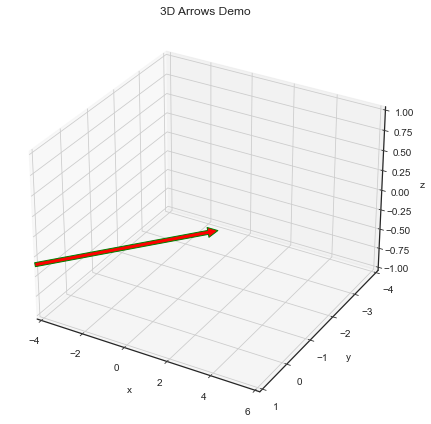

In [50]:
# Example

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-4, 6)
ax.set_ylim(1, -4)
ax.set_zlim(-1, 1)
# ax.arrow3D(0,0,0,
#            1,1,1,
#            mutation_scale=20,
#            arrowstyle="-|>",
#            linestyle='dashed')
ax.arrow3D(-3,2,0,
           5,-3,0,
           mutation_scale=20,
           ec ='green',
           fc='red')
ax.set_title('3D Arrows Demo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()

<h4>Plotting an image on the internet in Python</h4>

Here, we simply use the `imageio` library to plot my Github image in this notebook

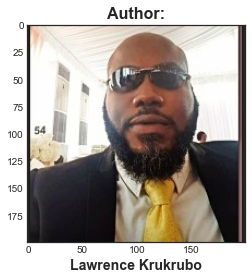

{'tags': ['hide-input']}

In [92]:
import imageio

# Save the Github Image Link as URL
url = 'https://media-exp1.licdn.com/dms/image/C4D03AQGlUpB4trDYMA/profile-displayphoto-shrink_200_200/0?e=1612396800&v=beta&t=PBkM4j-hTUyivudEpTTMDS5104IVv66DlEmzc6zcWIM'

# Read in the imgae
image = imageio.imread(url)

# Plot the image
plt.imshow(image)
plt.title('Author:', fontweight='bold', fontsize=16)
plt.xlabel('Lawrence Krukrubo', fontweight='bold', fontsize=14)
plt.show()

{
    "tags": [
        "hide-input",
    ]
}

**Python code to plot the point-normal vector of a plane**

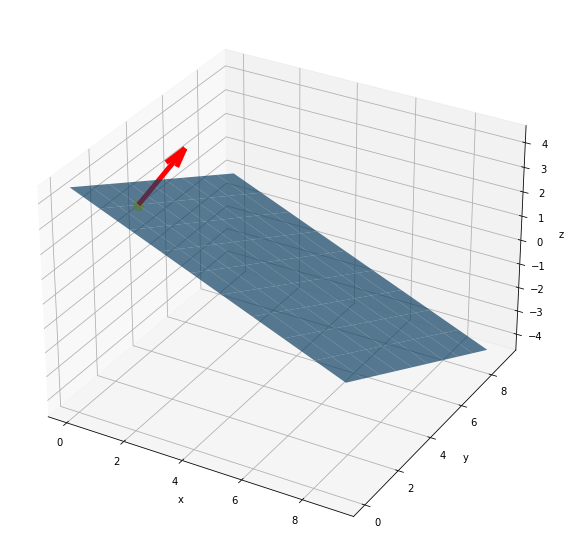

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

# set normal vector, and point on plane
point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# setup plot
plt3d = plt.figure(figsize=(10,10)).gca(projection='3d');
plt3d.set_xlabel('x');
plt3d.set_ylabel('y');
plt3d.set_zlabel('z');

# plot the surface
plt3d.plot_surface(xx, yy, z, alpha=0.7);

# plot the point
plt3d.plot([point[0]], [point[1]], [point[2]], color='yellow', marker='o', markersize=10, alpha=0.8);

# set the normal vector to start at the center of the plane
startX = np.mean(plt3d.get_xlim())
startY = np.mean(plt3d.get_ylim())
startZ = (-normal[0] * startX - normal[1] * startY - d) * 1. /normal[2]

# set the normal vector to start at the point on the plane
startX = point[0]
startY = point[1]
startZ = point[2]

# plot the normal vector
plt3d.quiver([startX], [startY], [startZ], [normal[0]], [normal[1]], [normal[2]], linewidths = (5,), edgecolor="red");